In [2]:
from google.colab import files
uploaded = files.upload()

Saving SDnobel.csv to SDnobel.csv


Original shape: (911, 24)
   Unnamed: 0  year    category  \
0           0  1901   Chemistry   
1           1  1901  Literature   
2           2  1901    Medicine   
3           3  1901       Peace   
4           4  1901       Peace   

                                            prize  \
0               The Nobel Prize in Chemistry 1901   
1              The Nobel Prize in Literature 1901   
2  The Nobel Prize in Physiology or Medicine 1901   
3                      The Nobel Peace Prize 1901   
4                      The Nobel Peace Prize 1901   

                                          motivation prize_share  laureate_id  \
0  "in recognition of the extraordinary services ...         1/1          160   
1  "in special recognition of his poetic composit...         1/1          569   
2  "for his work on serum therapy, especially its...         1/1          293   
3                                                NaN         1/2          462   
4                                      

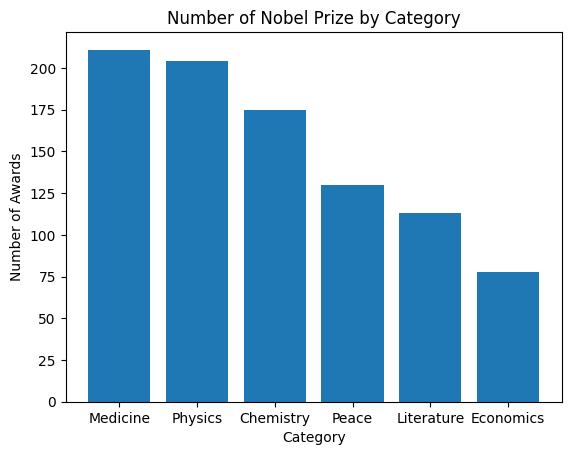

decade
1900     57
1910     40
1920     54
1930     56
1940     43
1950     72
1960     79
1970    104
1980     97
1990    104
2000    123
2010     82
Name: count, dtype: int64


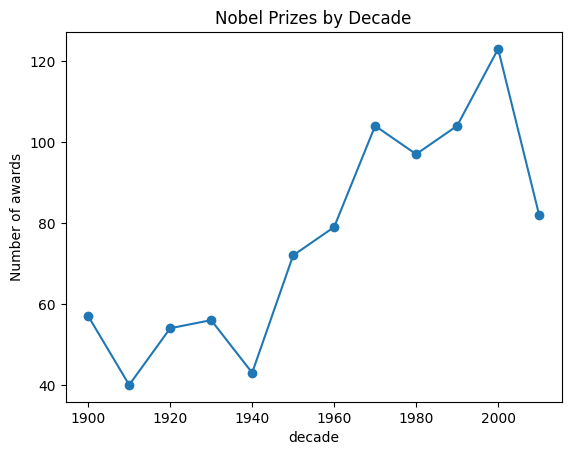

sex     Female   Male  Unknown
decade                        
1900       3.0   53.0      1.0
1910       1.0   37.0      2.0
1920       2.0   52.0      NaN
1930       3.0   52.0      1.0
1940       3.0   37.0      3.0
1950       NaN   71.0      1.0
1960       3.0   72.0      4.0
1970       4.0   99.0      1.0
1980       4.0   90.0      3.0
1990       7.0   94.0      3.0
2000      11.0  108.0      4.0
2010       8.0   71.0      3.0


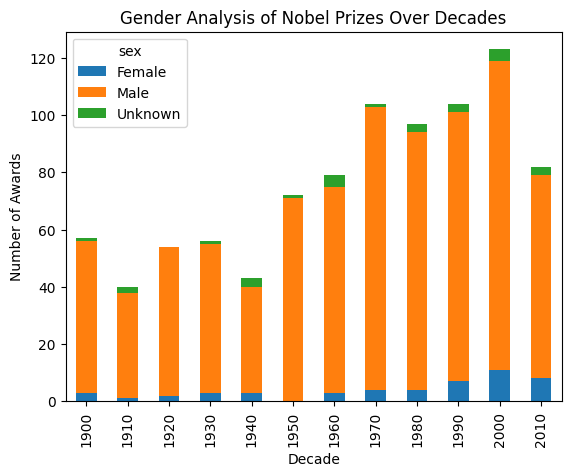

   decade      sex  count
0    1900   Female      3
1    1900     Male     53
2    1900  Unknown      1
3    1910   Female      1
4    1910     Male     37
category
Peace         16
Literature    14
Medicine      12
Chemistry      4
Physics        2
Economics      1
Name: count, dtype: int64


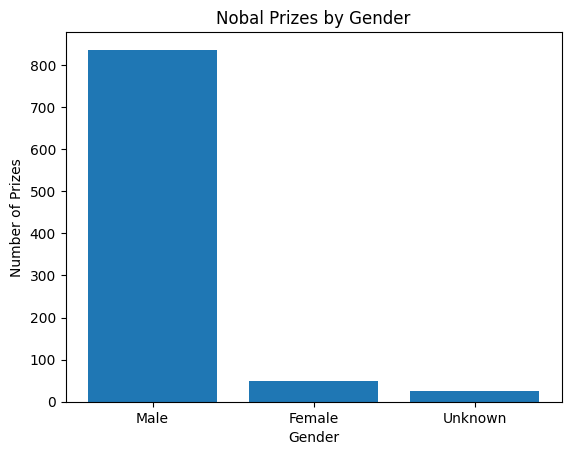

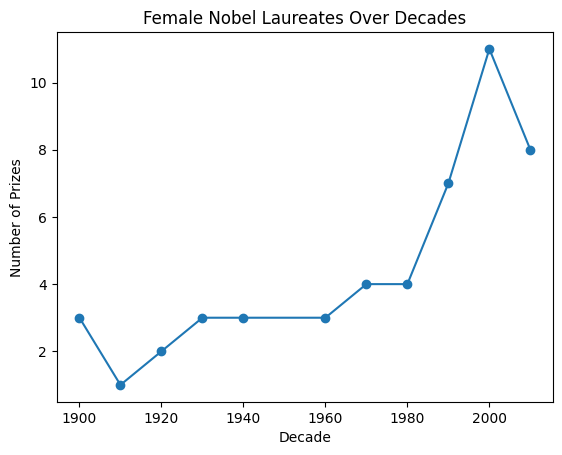

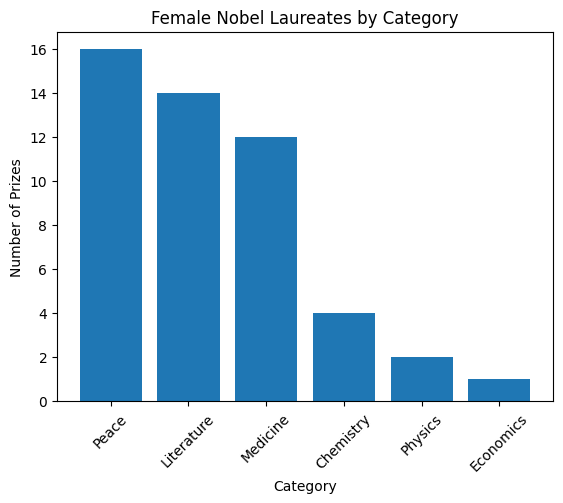

   decade      sex  count     ratio
0    1900   Female      3  0.052632
1    1900     Male     53  0.929825
2    1900  Unknown      1  0.017544
3    1910   Female      1  0.025000
4    1910     Male     37  0.925000


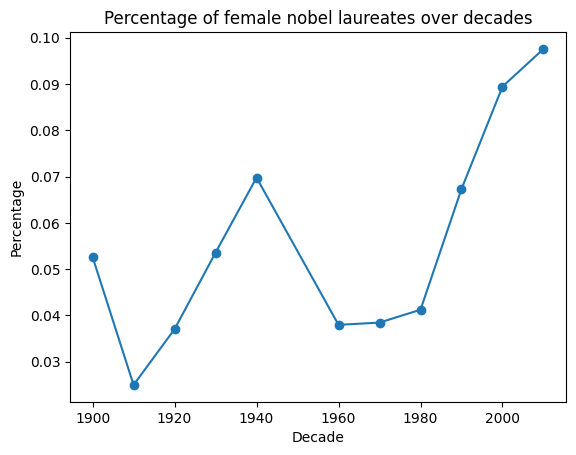

category
Physics       1903
Peace         1905
Literature    1909
Chemistry     1911
Medicine      1947
Economics     2009
Name: year, dtype: int64


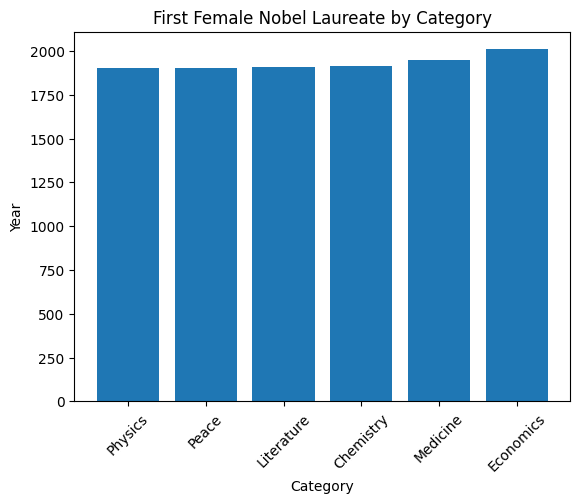

            First Male  First Female
category                            
Chemistry         1901          1911
Economics         1969          2009
Literature        1901          1909
Medicine          1901          1947
Peace             1901          1905
Physics           1901          1903


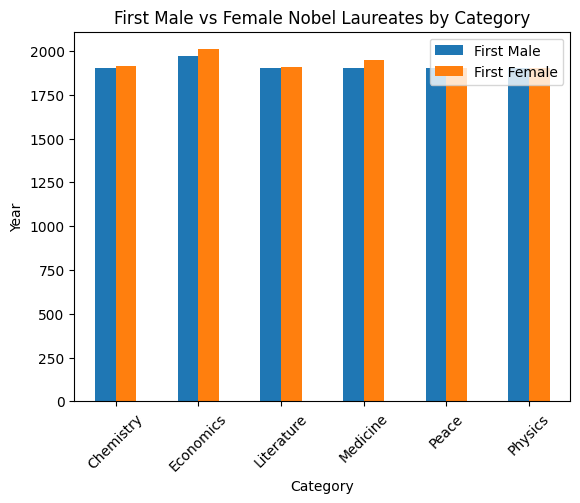

            First Male  First Female  Gap (Years)
category                                         
Medicine          1901          1947           46
Economics         1969          2009           40
Chemistry         1901          1911           10
Literature        1901          1909            8
Peace             1901          1905            4
Physics           1901          1903            2


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv("SDnobel.csv")
print("Original shape:", df.shape) #dataset shape
print(df.head()) #first 5 rows
df.info() #data types & non-null values
print(df.describe())# statistical summary

#missing values per column
missing_values = df.isna().sum()
print(missing_values[missing_values > 0])

#percentage of missing values
missing_percentage = (df.isna().sum() / len(df))*100
print(missing_percentage[missing_percentage >0])

#column types summary
print(df.dtypes.value_counts())

columns_needed=[
    'year',
    'category',
    'motivation',
    'full_name',
    'birth_date',
    'birth_country',
    'sex',
    'decade',
    'age_group'
]
df = df[columns_needed]
print("Shape after selecting columns: ", df.shape)

df['birth_country']=df['birth_country'].fillna('Unknown')
df['sex']=df['sex'].fillna('Unknown')
df['motivation']=df['motivation'].fillna('Not specified')


print(df.head())
print(df.info())
print("*****************************")


category_value=df.category.value_counts()
print(category_value)
plt.bar(category_value.index, category_value.values)
plt.title("Number of Nobel Prize by Category")
plt.xlabel("Category")
plt.ylabel("Number of Awards")
plt.show()

decade_analysis=df.decade.value_counts().sort_index()
print(decade_analysis)
plt.plot(decade_analysis.index, decade_analysis.values, marker='o')
plt.title("Nobel Prizes by Decade")
plt.xlabel("decade")
plt.ylabel("Number of awards")
plt.show()

gender_decade=df.groupby(['decade', 'sex']).size().unstack()
print(gender_decade)
gender_decade.plot(kind='bar', stacked=True)
plt.title("Gender Analysis of Nobel Prizes Over Decades")
plt.xlabel("Decade")
plt.ylabel("Number of Awards")
plt.show()

df['sex'].value_counts()
gender_decade= df.groupby(['decade', 'sex']).size().reset_index(name='count')
print(gender_decade.head())

#النساء حسب المجال (Female x Category)
female_df = df[df['sex']=='Female']
female_by_category = female_df['category'].value_counts()
print(female_by_category)

#الجوائز حسب الجنس
gender_counts = df['sex'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.title("Nobal Prizes by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Prizes")
plt.show()

#line chart النساء عبر العقود
female_decade = gender_decade[gender_decade['sex']=='Female']
female_decade = female_decade.sort_values('decade')
plt.plot(female_decade['decade'], female_decade['count'], marker='o')
plt.title("Female Nobel Laureates Over Decades")
plt.xlabel("Decade")
plt.ylabel("Number of Prizes")
plt.show()

#bar chart النساء حسب المجال
plt.bar(female_by_category.index, female_by_category.values)
plt.title("Female Nobel Laureates by Category")
plt.xlabel("Category")
plt.ylabel("Number of Prizes")
plt.xticks(rotation=45)
plt.show()

#هل نسبة النساء زادت؟
gender_ratio=(
    df.groupby(['decade', 'sex'])
    .size()
    .reset_index(name='count')
)
gender_ratio['ratio']=(
    gender_ratio['count']/
    gender_ratio.groupby('decade')['count'].transform('sum')
)
print(gender_ratio.head())
female_ratio = gender_ratio[gender_ratio['sex']=='Female']

plt.plot(female_ratio['decade'], female_ratio['ratio'], marker='o')
plt.title("Percentage of female nobel laureates over decades")
plt.xlabel("Decade")
plt.ylabel("Percentage")
plt.show()

#متى دخلت النساء كل مجال لأول مرة؟
female_firsts=(
    df[df['sex']=='Female']
    .groupby('category')['year']
    .min()
    .sort_values()
)
print(female_firsts)

plt.bar(female_firsts.index, female_firsts.values)
plt.title("First Female Nobel Laureate by Category")
plt.xlabel("Category")
plt.ylabel("Year")
plt.xticks(rotation=45)
plt.show()

#first female vs first male per category
male_firsts=(
    df[df['sex']=='Male']
    .groupby('category')['year']
    .min()
)

first_gender_comparison=pd.DataFrame({
   'First Male' : male_firsts,
   'First Female': female_firsts
})
print(first_gender_comparison)

first_gender_comparison.plot(kind='bar')
plt.title("First Male vs Female Nobel Laureates by Category")
plt.xlabel("Category")
plt.ylabel("Year")
plt.xticks(rotation=45)
plt.show()

first_gender_comparison['Gap (Years)']=(
    first_gender_comparison['First Female']-
    first_gender_comparison['First Male']
)
print(first_gender_comparison.sort_values('Gap (Years)', ascending=False))